# Tutorial 1 : Leptonic Emission #

## Learning Outcome ##

1. *Acquaint with the basic functionalities of agnpy*
2. *Define various properties of *blob* for one-zone model*
3. *Quantify various physical properties of the blob from input parameters*
4. *Obtain first Spectral energy distribution for given set of parameters*
5. *Learn how to alter parameters and make a full Leptonic SED*

## Leptonic Emission ## 

Assume jet emission is primarily due to electron processes - viz., Synchrotron (first hump) and Synchrotron Self-Compton (second hump). 
Additionally, the Synchroton emission can also show *Self-Absorption* for very low frequencies. 

The task of this tutorial would be to plot a complete SED for a typical AGN one-zone model with three leptonic processes into account:

1. SYNCHROTRON PROCESS
2. SYNCHROTRON SELF-COMPTON
3. SYNCHROTRON SELF-ABSORPTION

### STEP 1 ###
Import numpy, astropy and matplotlib for basic functionalities

In [1]:
import numpy as np
import astropy.units as u
from astropy.constants import m_e
from astropy.coordinates import Distance
import matplotlib.pyplot as plt
from IPython.display import Image

### STEP 2 ###
import agnpy classes for the following tasks : 

1. Defining particle spectra -- *agn.spectra*
2. Defining properties of blob -- *agn.emission_region*
3. Defining the emission mechanisms -- *agn.synchrotron* and *agn.compton*
4. Finally utlities for plotting the SED -- *agn.utils.plot*

Finally load the default matplotlib rcParams for SED plotting. 


In [2]:
from agnpy.spectra import PowerLaw
from agnpy.emission_regions import Blob
from agnpy.synchrotron import Synchrotron
from agnpy.compton import SynchrotronSelfCompton
from agnpy.utils.plot import plot_sed, load_mpl_rc

load_mpl_rc()

### STEP 3a ###

Define *blob* properties -- 

1. Radius 
2. Volume 
3. Distance of the blob from the observer.
4. Doppler Factor.
5. Lorentz Factor.
6. Magnetic Fields.

Remember the lesson on *astropy* and define these quanties along with physical units.

In [3]:
# blob properties
R_b = 1e16 * u.cm
V_b = 4 / 3 * np.pi * R_b ** 3
z = Distance(1e27, unit=u.cm).z
delta_D = 10
Gamma = 10
B = 1.0 * u.G

### STEP 3b ###
$\gamma$ is energy of e

Define *particle spectra* properties -- 

1. Total Non-Thermal energy of electrons in *ergs* - $$W_e = V_b\int_{\gamma_{\rm min}}^{\gamma_{\rm max}} \gamma m_e c^2 N(\gamma) d\gamma$$
2. The value of energy bounds - $$\gamma_{\rm max} \rm \,\,\,and\,\,\, \gamma_{\rm min}$$
3. Nature of the particle distribution (number density) viz., *PowerLaw* along with it power-law index $p$ -- $$N(\gamma) \propto \gamma^{-p}$$


In [4]:

# electron distribution
W_e = 1e48 * u.Unit("erg")

n_e = PowerLaw.from_total_energy(
    W=W_e, V=V_b, p=2.8, gamma_min=1e2, gamma_max=1e7, mass=m_e
)

blob = Blob(R_b, z, delta_D, Gamma, B, n_e=n_e)

### STEP 4 ###

Now check if all the properties of *blob* and *particle spectral distribution is fine.
Further compute some more derived physical properties. 

1. Total number of Electrons. $$ N = V_b \int_{\gamma_{\rm min}}^{\gamma_{\rm max}} N(\gamma) d\gamma $$
2. Kinetic Jet Power $ P_{\rm ke}$ - Total kinetic energy of the blob per unit time. 
3. Magnetic Jet Power $ P_{\rm me}$ - Total magnetic energy of the blob per unit time. 

In [5]:
print(blob)

* Spherical emission region
 - R_b (radius of the blob): 1.00e+16 cm
 - t_var (variability time scale): 4.13e-01 d
 - V_b (volume of the blob): 4.19e+48 cm3
 - z (source redshift): 0.07 redshift
 - d_L (source luminosity distance):1.00e+27 cm
 - delta_D (blob Doppler factor): 1.00e+01
 - Gamma (blob Lorentz factor): 1.00e+01
 - Beta (blob relativistic velocity): 9.95e-01
 - theta_s (jet viewing angle): 5.74e+00 deg
 - B (magnetic field tangled to the jet): 1.00e+00 G
 - xi (coefficient for 1st order Fermi acceleration) : 1.00e+00
* electrons energy distribution
 - power law
 - k: 9.27e+06 1 / cm3
 - p: 2.80
 - gamma_min: 1.00e+02
 - gamma_max: 1.00e+07



In [6]:
# we can also print the total electrons number and energy
print(f"total particle number: {blob.N_e_tot:.2e}")
print(f"total energy in electrons: {blob.W_e:.2e}")

total particle number: 5.44e+51
total energy in electrons: 1.00e+48 erg


In [7]:
# as well as the jet power in particles and magnetic fields (see the documentation for more details)
print(f"jet power in particles: {blob.P_jet_ke:.2e}")
print(f"jet power in magnetic field: {blob.P_jet_B:.2e}")

jet power in particles: 4.47e+44 erg / s
jet power in magnetic field: 7.46e+43 erg / s


### STEP 5 ###

Define both emission models [FOR THE FIRST HUMP] for comparison -- 
1. Synchrotron 
2. Synchroton + Synchrotron Self Absorption


In [8]:
synch = Synchrotron(blob)
synch_ssa = Synchrotron(blob, ssa=True)

### STEP 6 ### 

Compute the SED Flux (erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$) and plot the same for both the models considered.

**NOTE**

The quantity on the Y-axis is $\nu F_{\nu}$ so that integration under the curve is related to energy emitted per unit frequency aince photon energy $E = h\nu$.


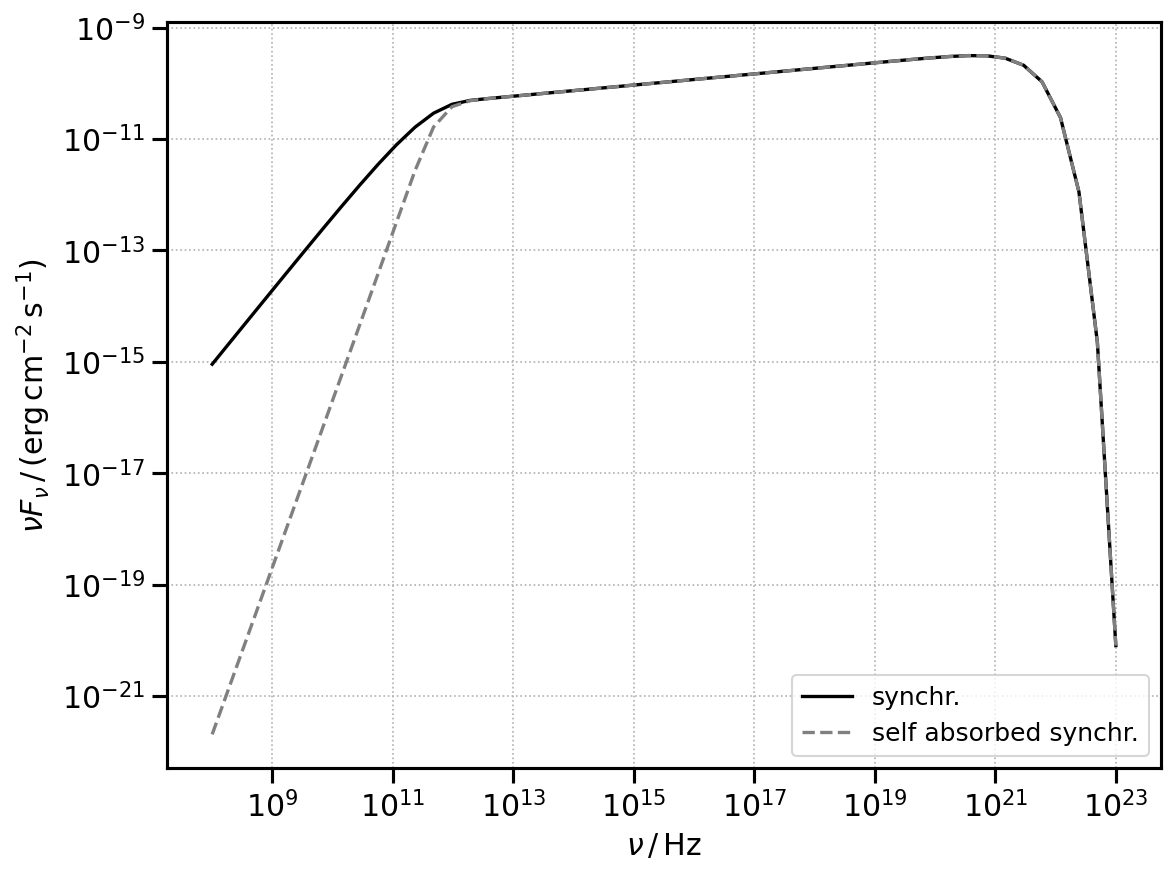

In [9]:
# let us define now a grid of frequencies over which to calculate the synchrotron SED
nu_syn = np.logspace(8, 23) * u.Hz

# let us compute a synchrotron, and a self-absorbed synchrotron SED
synch_sed = synch.sed_flux(nu_syn)
synch_sed_ssa = synch_ssa.sed_flux(nu_syn)

fig, ax = plt.subplots(figsize=(8, 6))
plot_sed(nu_syn, synch_sed, ax=ax, color="k", label="synchr.")
plot_sed(
    nu_syn, synch_sed_ssa, ax=ax, ls="--", color="gray", label="self absorbed synchr."
)
plt.show()

### STEP 5b ###

Define both emission models [FOR THE SECOND HUMP] for comparison -- 
1. Synchrotron Self Compton (SSC)
2. Synchroton Self Compton + Synchrotron Self Absorption

In [10]:
# simple ssc
ssc = SynchrotronSelfCompton(blob)

# ssc over a self-absorbed synchrotron spectrum
ssc_ssa = SynchrotronSelfCompton(blob, ssa=True)

### STEP 6b ### 

Compute the SED Flux (erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$) and plot the same for both the models considered.

**NOTE**

The quantity on the Y-axis is $\nu F_{\nu}$ so that integration under the curve is related to energy emitted per unit frequency aince photon energy $E = h\nu$.

C:\Users\thesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\agnpy\synchrotron\synchrotron.py:66: RuntimeWarning: divide by zero encountered in divide
  u = 1 / 2 + np.exp(-tau) / tau - (1 - np.exp(-tau)) / np.power(tau, 2)
C:\Users\thesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\agnpy\synchrotron\synchrotron.py:66: RuntimeWarning: invalid value encountered in divide
  u = 1 / 2 + np.exp(-tau) / tau - (1 - np.exp(-tau)) / np.power(tau, 2)


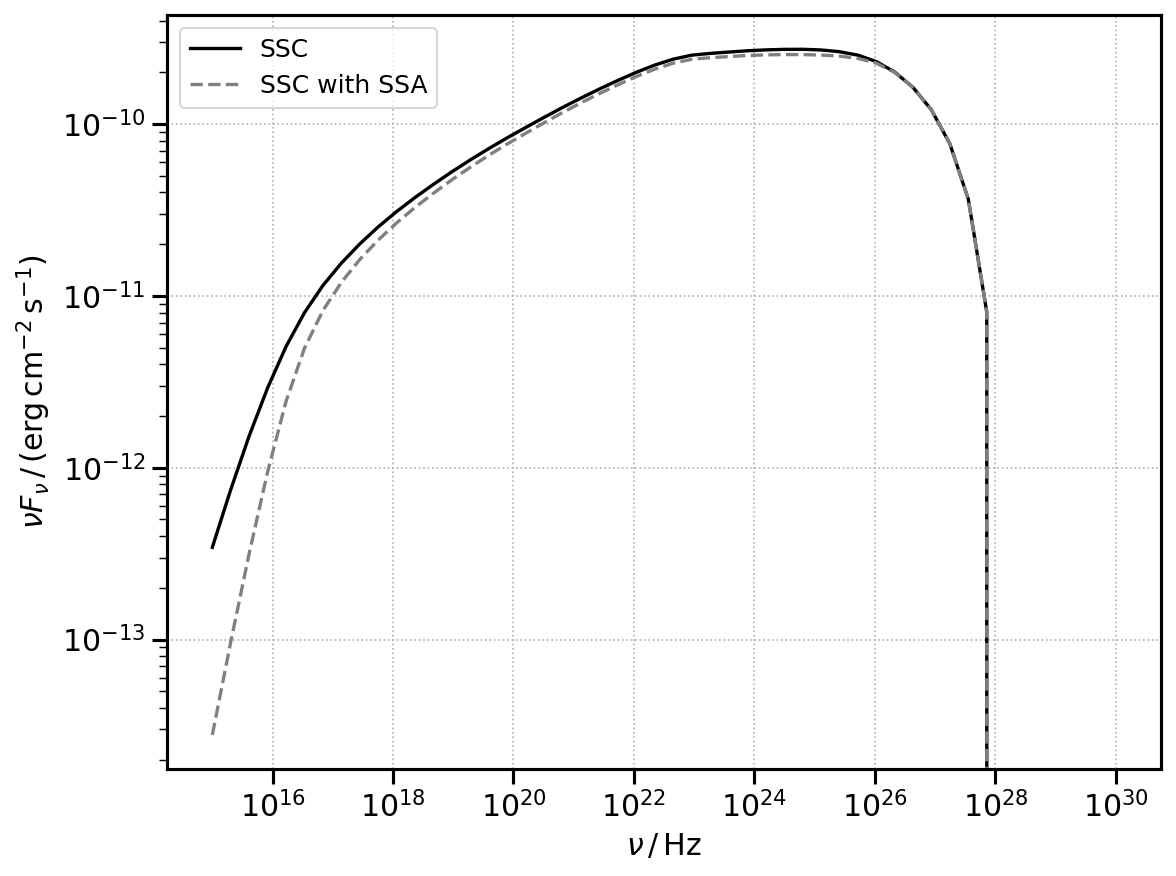

In [11]:
nu_ssc = np.logspace(15, 30) * u.Hz
sed_ssc = ssc.sed_flux(nu_ssc)
sed_ssc_ssa = ssc_ssa.sed_flux(nu_ssc)

fig, ax = plt.subplots(figsize=(8, 6))

plot_sed(nu_ssc, sed_ssc, color="k", label="SSC")
plot_sed(nu_ssc, sed_ssc_ssa, ls="--", color="gray", label="SSC with SSA")
plt.show()

# TUTORIAL TASKS #

TASK 1 - Using some aspects of the above code, create a figure 7.4 from the Dermer and Menon 2009 book - *High Energy Radiation from Black Holes: Gamma Rays, Cosmic Rays, and Neutrinos*

***HINT***
All properties of the blob are same apart from the value of $\gamma_{\rm max}$. 

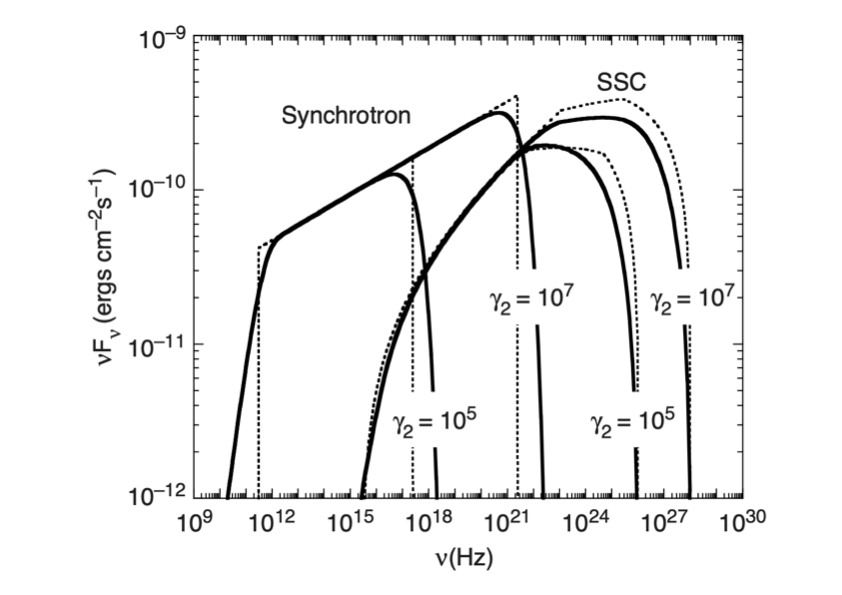

In [12]:
Image("figures/tut_fig.png", width=600, height=400)

# ASSIGNMENT TASKS # 

Check for yourself how the SEDs change with the change in following quantities - 
1. Magnetic fields 
2. Power-law index $p$

***NOTE***
Make sure to check the ratio of kinetic power and magnetic power for the values that you choose. Typical jet powers range between $10^{42}$ to $10^{46}$ ergs/s.